In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# loading packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
#

import seaborn as sns
import plotly.express as px

#

import os
import random
import re
import math
import time

from tqdm import tqdm
from tqdm.keras import TqdmCallback


from pandas_summary import DataFrameSummary

import warnings


warnings.filterwarnings('ignore') # Disabling warnings for clearer outputs



seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)

In [4]:
train = pd.read_csv(r"C:\Users\30694\Downloads\Melanoma_DeepLearning\siim-isic-melanoma-classification\train.csv")
test  = pd.read_csv(r"C:\Users\30694\Downloads\Melanoma_DeepLearning\siim-isic-melanoma-classification\test.csv")

In [5]:
print(
    f'Train data has {train.shape[1]} features, {train.shape[0]} observations and Test data {test.shape[1]} features, {test.shape[0]} observations.\nTrain features are:\n{train.columns.tolist()}\nTest features are:\n{test.columns.tolist()}'
)

Train data has 8 features, 33126 observations and Test data 5 features, 10982 observations.
Train features are:
['image_name', 'patient_id', 'sex', 'age_approx', 'anatom_site_general_challenge', 'diagnosis', 'benign_malignant', 'target']
Test features are:
['image_name', 'patient_id', 'sex', 'age_approx', 'anatom_site_general_challenge']


In [6]:
train.columns = [
    'img_name', 'id', 'sex', 'age', 'location', 'diagnosis',
    'benign_malignant', 'target'
]
test.columns = ['img_name', 'id', 'sex', 'age', 'location']

In [7]:
b=train[train['benign_malignant']=='benign']

In [8]:
m=train[train['benign_malignant']=='malignant']

In [9]:
b=b.drop(['diagnosis'],axis=1)
m=m.drop(['diagnosis'],axis=1)

In [10]:
b

,img_name,id,sex,age,location,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,benign,0
...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,benign,0


In [11]:
# Setting color palette.
orange_black = [
    '#fdc029', '#df861d', '#FF6347', '#aa3d01', '#a30e15', '#800000', '#171820'
]

# Setting plot styling.
plt.style.use('ggplot')

Text(0.5, 1.0, 'Test Data Missing Values')

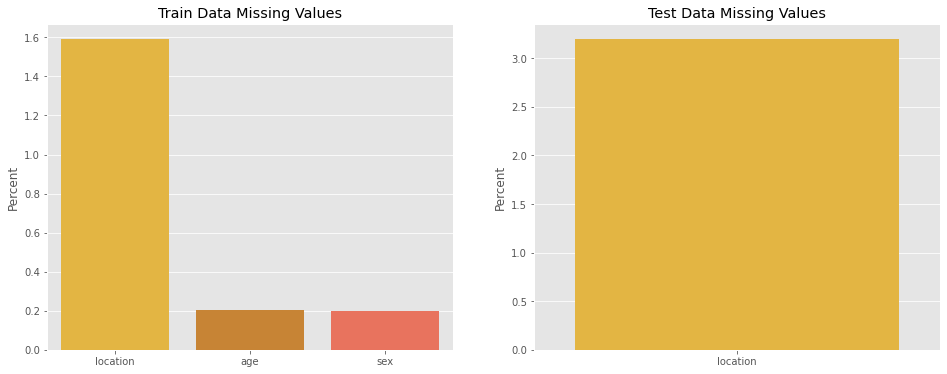

In [12]:
# Checking missing values:

def missing_percentage(df):

    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


missing_train = missing_percentage(train)
missing_test = missing_percentage(test)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=missing_train.index,
            y='Percent',
            data=missing_train,
            palette=orange_black,
            ax=ax[0])

sns.barplot(x=missing_test.index,
            y='Percent',
            data=missing_test,
            palette=orange_black,
            ax=ax[1])

ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')

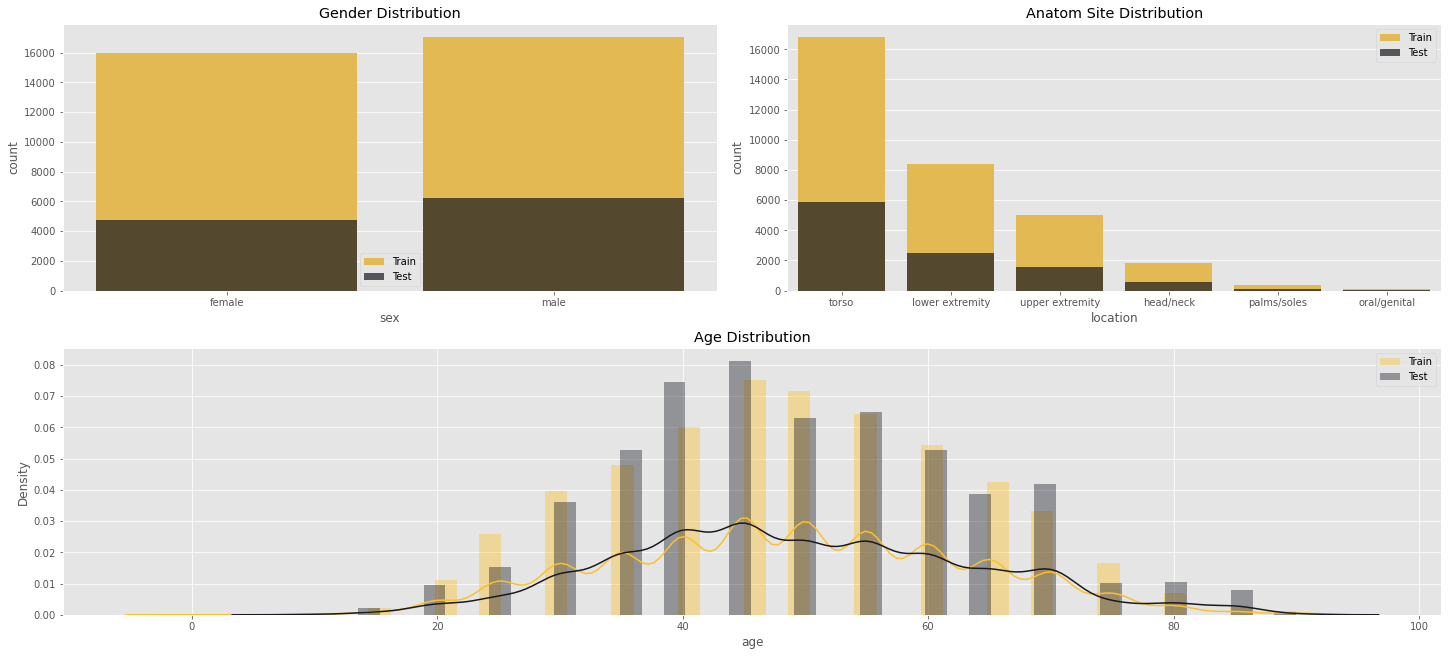

In [13]:
# Creating a customized chart and giving in figsize etc.

fig = plt.figure(constrained_layout=True, figsize=(20, 9))

# Creating a grid:

grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

# Set the title.

ax1.set_title('Gender Distribution')

sns.countplot(train.sex.sort_values(ignore_index=True),
              alpha=0.9,
              ax=ax1,
              color='#fdc029',
              label='Train')
sns.countplot(test.sex.sort_values(ignore_index=True),
              alpha=0.7,
              ax=ax1,
              color='#171820',
              label='Test')
ax1.legend()

# Customizing the second grid.

ax2 = fig.add_subplot(grid[0, 2:])

# Plot the countplot.
sns.countplot(train.location,
              alpha=0.9,
              ax=ax2,
              color='#fdc029',
              label='Train',
              order=train['location'].value_counts().index)
sns.countplot(test.location,
              alpha=0.7,
              ax=ax2,
              color='#171820',
              label='Test',
              order=test['location'].value_counts().index), ax2.set_title(
                  'Anatom Site Distribution')

ax2.legend()

# Customizing the third grid.

ax3 = fig.add_subplot(grid[1, :])

# Set the title.

ax3.set_title('Age Distribution')

# Plot the histogram.

sns.distplot(train.age, ax=ax3, label='Train', color='#fdc029')
sns.distplot(test.age, ax=ax3, label='Test', color='#171820')

ax3.legend()

plt.show()

In [14]:
# Filling missing anatom site values with 'unknown' tag:

for df in [m, b]:
    df['location'].fillna('unknown', inplace=True)

In [15]:
# Double checking:

ids_train = m.location.values
ids_test = m.location.values
ids_train_set = set(ids_train)
ids_test_set = set(ids_test)

location_not_overlap = list(ids_train_set.symmetric_difference(ids_test_set))
n_overlap = len(location_not_overlap)
if n_overlap == 0:
    print(
        f'There are no different body parts occuring between train and test set...'
    )
else:
    print('There are some not overlapping values between train and test set!')

There are no different body parts occuring between train and test set...


In [16]:
# Filling age and sex with appropriate values.

b['sex'].fillna(b['sex'].mode()[0], inplace=True)

b['age'].fillna(b['age'].median(), inplace=True)

m['sex'].fillna(m['sex'].mode()[0], inplace=True)

m['age'].fillna(m['age'].median(), inplace=True)

In [17]:
# Checking missing value counts:

print(
    f'benign missing value count: {b.isnull().sum().sum()}\nmalignant missing value count: {m.isnull().sum().sum()}'
)


benign missing value count: 0
malignant missing value count: 0


In [18]:
# Train data:

cntstr = train.location.value_counts().rename_axis('location').reset_index(
    name='count')

fig = px.treemap(cntstr,
                 path=['location'],
                 values='count',
                 color='count',
                 color_continuous_scale=orange_black,
                 title='Scans by Anatom Site General Challenge - Train Data')

fig.update_traces(textinfo='label+percent entry')
fig.show()

In [19]:
# Test data:

cntste = test.location.value_counts().rename_axis('location').reset_index(
    name='count')

fig = px.treemap(cntste,
                 path=['location'],
                 values='count',
                 color='count',
                 color_continuous_scale=orange_black,
                 title='Scans by Anatom Site General Challenge - Test Data')

fig.update_traces(textinfo='label+percent entry')
fig.show()

No handles with labels found to put in legend.


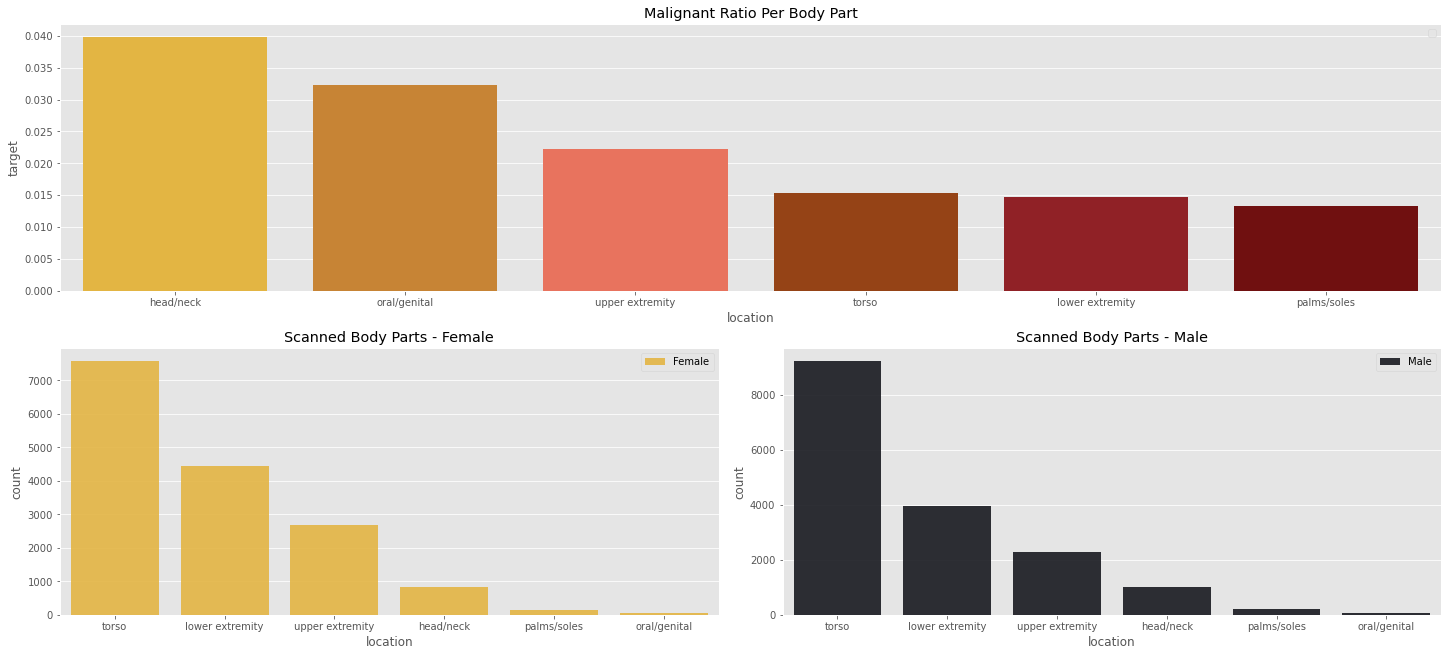

In [20]:
# Creating a customized chart and giving in figsize etc.

fig = plt.figure(constrained_layout=True, figsize=(20, 9))
# Creating a grid
grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

# Customizing the first grid.

ax1 = fig.add_subplot(grid[1, :2])
# Set the title.
ax1.set_title('Scanned Body Parts - Female')

# Plot:

sns.countplot(
    train[train['sex'] == 'female'].location.sort_values(ignore_index=True),
    alpha=0.9,
    ax=ax1,
    color='#fdc029',
    label='Female',
    order=train['location'].value_counts().index)
ax1.legend()

# Customizing the second grid.

ax2 = fig.add_subplot(grid[1, 2:])

# Set the title.

ax2.set_title('Scanned Body Parts - Male')

# Plot.

sns.countplot( train[train['sex'] == 'male'].location.sort_values(ignore_index=True),
    alpha=0.9,
    ax=ax2,
    color='#171820',
    label='Male',
    order=train['location'].value_counts().index)

ax2.legend()

# Customizing the third grid.

ax3 = fig.add_subplot(grid[0, :])

# Set the title.

ax3.set_title('Malignant Ratio Per Body Part')

# Plot.

loc_freq = train.groupby('location')['target'].mean().sort_values(
    ascending=False)
sns.barplot(x=loc_freq.index, y=loc_freq, palette=orange_black, ax=ax3)

ax3.legend()

plt.show()


In [23]:
# Plotting interactive sunburst:

fig = px.sunburst(data_frame=train,
                  path=['benign_malignant', 'sex', 'location'],
                  color='sex',
                  color_discrete_sequence=orange_black,
                  maxdepth=-1,
                  title='Sunburst Chart Benign/Malignant > Sex > Location')

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

ValueError: ('None entries cannot have not-None children', benign_malignant       benign
sex                       nan
location            head/neck
Name: 3189, dtype: object)

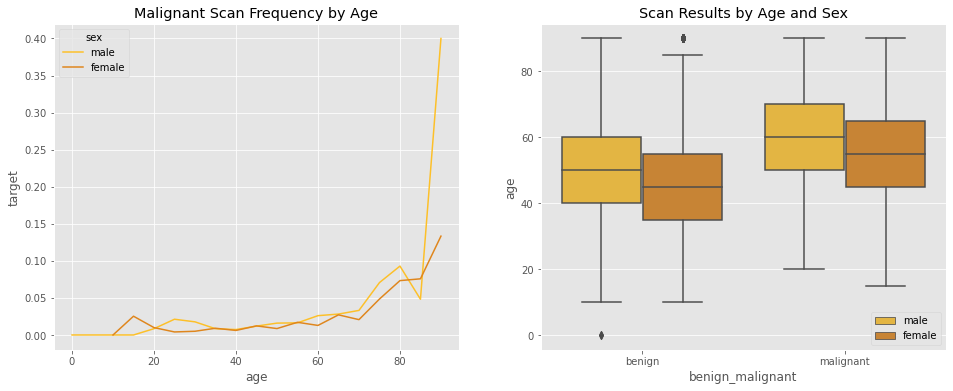

In [27]:
# Plotting age vs sex vs target:

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.lineplot(x='age',
             y='target',
             data=train,
             ax=ax[0],
             hue='sex',
             palette=orange_black[:2],
             ci=None)
sns.boxplot(x='benign_malignant',
            y='age',
            data=train,
            ax=ax[1],
            hue='sex',
            palette=orange_black)

plt.legend(loc='lower right')

ax[0].set_title('Malignant Scan Frequency by Age')
ax[1].set_title('Scan Results by Age and Sex')

plt.show()

No handles with labels found to put in legend.


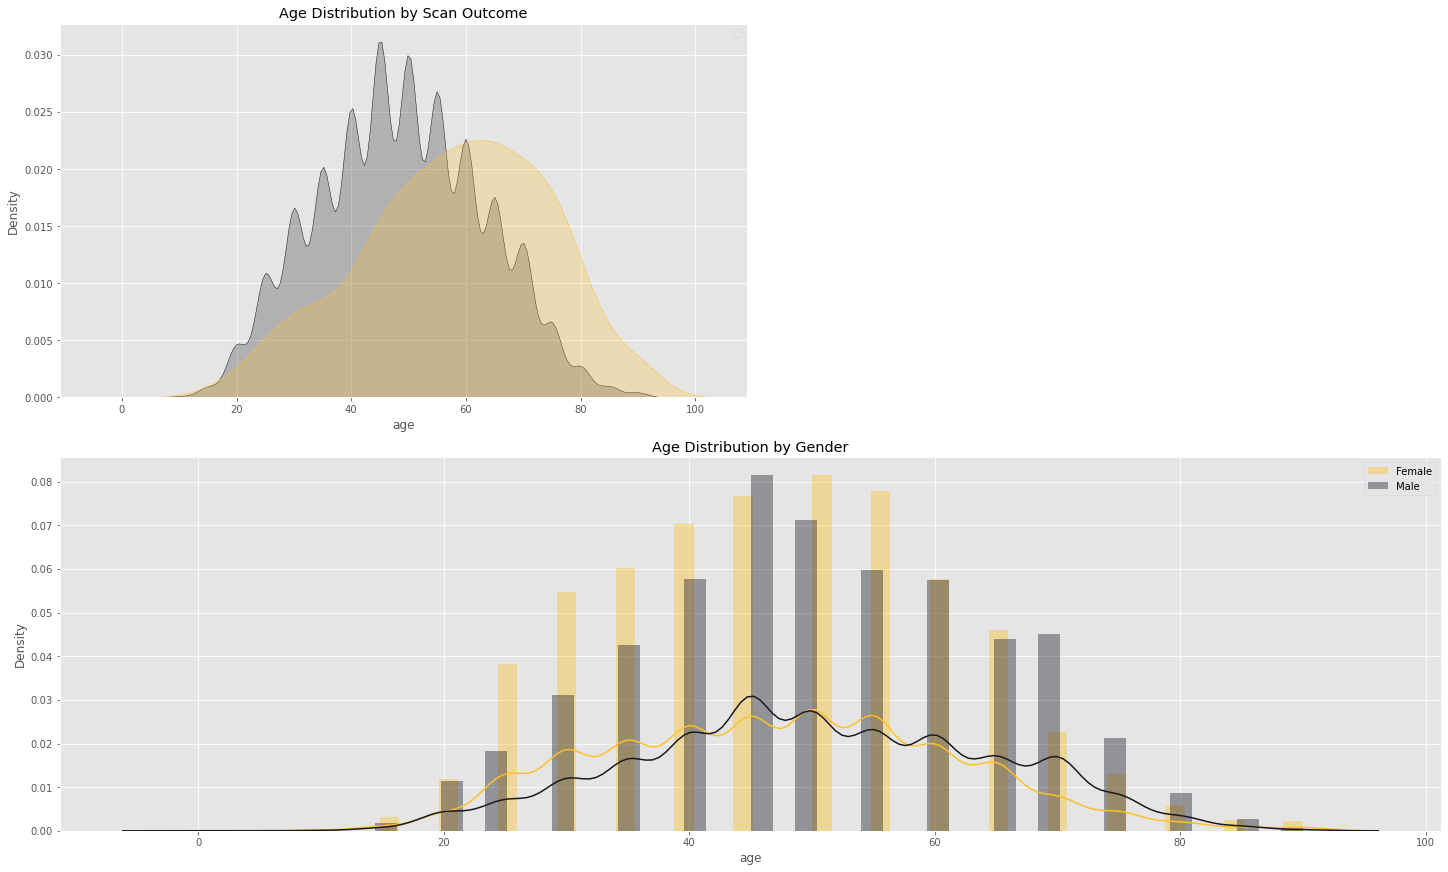

In [28]:
# Creating a customized chart and giving in figsize etc.

# Plotting age dist vs target and age dist vs datasets

fig = plt.figure(constrained_layout=True, figsize=(20, 12))

# Creating a grid

grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

# Customizing the first grid.

ax1 = fig.add_subplot(grid[0, :2])

# Set the title.

ax1.set_title('Age Distribution by Scan Outcome')

# Plot

ax1.legend()

sns.kdeplot(train[train['target'] == 0]['age'],
            shade=True,
            ax=ax1,
            color='#171820',
            label='Benign')
sns.kdeplot(train[train['target'] == 1]['age'],
            shade=True,
            ax=ax1,
            color='#fdc029',
            label='Malignant')

# Customizing second grid.ax2 = fig.add_subplot(grid[0, 2:])

# Set the title.

ax2.set_title('Age Distribution by Train/Test Observations')

# Plot.

sns.kdeplot(train.age, label='Train', shade=True, ax=ax2, color='#171820')
sns.kdeplot(test.age, label='Test', shade=True, ax=ax2, color='#fdc029')

ax2.legend()

# Customizing third grid.

ax3 = fig.add_subplot(grid[1, :])

# Set the title.

ax3.set_title('Age Distribution by Gender')

# Plot

sns.distplot(train[train.sex == 'female'].age,
             ax=ax3,
             label='Female',
             color='#fdc029')
sns.distplot(train[train.sex == 'male'].age,
             ax=ax3,
             label='Male',
             color='#171820')
ax3.legend()

plt.show()

In [32]:
diag = train.diagnosis.value_counts()
fig = px.pie(diag,
             values='diagnosis',
             names=diag.index,
             color_discrete_sequence=orange_black,
             hole=.4)
fig.update_traces(textinfo='percent+label', pull=0.05)
fig.show()

In [67]:
train.diagnosis.value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
atypical melanocytic proliferation        1
cafe-au-lait macule                       1
Name: diagnosis, dtype: int64

In [116]:
m['target'].value_counts()

1    584
Name: target, dtype: int64

In [117]:
y_b = b['target'].values
y_m = m['target'].values

In [40]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y_m) # M=1 and B=0

In [118]:
X_m

,sex,age,location,head/neck_left,lower extremity_left,oral/genital_left,palms/soles_left,torso_left,unknown_left,upper extremity_left,head/neck_right,lower extremity_right,oral/genital_right,palms/soles_right,torso_right,unknown_right,upper extremity_right
91,1,55.0,upper extremity,0,0,0,0,0,0,1,0,0,0,0,0,0,1
235,1,50.0,upper extremity,0,0,0,0,0,0,1,0,0,0,0,0,0,1
314,0,55.0,torso,0,0,0,0,1,0,0,0,0,0,0,1,0,0
399,0,65.0,torso,0,0,0,0,1,0,0,0,0,0,0,1,0,0
459,1,65.0,lower extremity,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32969,0,55.0,upper extremity,0,0,0,0,0,0,1,0,0,0,0,0,0,1
33000,0,70.0,torso,0,0,0,0,1,0,0,0,0,0,0,1,0,0
33014,0,60.0,upper extremity,0,0,0,0,0,0,1,0,0,0,0,0,0,1
33050,0,65.0,lower extremity,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [119]:
#Define x and normalize values

#Define the independent variables. Let's also drop Gender, so we can normalize other data
X_b = b.drop(labels = ["img_name", "id", "target", "benign_malignant"], axis=1) 
X_m = m.drop(labels = ["img_name", "id", "target", "benign_malignant"], axis=1) 

In [120]:
X_b.sex = X_b.sex.replace({'male':0,'female':1})
X_b = X_b.join(pd.get_dummies(X_b["location"]),lsuffix='_left', rsuffix='_right')

In [121]:
X_m.sex = X_m.sex.replace({'male':0,'female':1})
X_m = X_m.join(pd.get_dummies(X_m["location"]),lsuffix='_left', rsuffix='_right')


In [105]:
X_m = X_m.join(pd.get_dummies(X_m["location"]),lsuffix='_left', rsuffix='_right')

In [123]:
X_m = X_m.drop(['location'],axis = 1)
X_b = X_b.drop(['location'],axis = 1)

In [53]:
X_b = X_b.drop('diagnosis',1)
X_m = X_m.drop('diagnosis',1)

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_b)
X_b = scaler.transform(X_b)

scaler.fit(X_m)
X_m = scaler.transform(X_m)


In [132]:
X_b.shape

(32542, 9)

In [134]:
np.save('metadata_benign.npy', X_b)
np.save('metadata_malignant.npy', X_m)

In [82]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [87]:
X_train.shape

(24844, 25)

In [83]:
#RANDOM FOREST, to compare against xgboost
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, random_state = 42)
#
## Train the model on training data
#model.fit(X_train, y_train) #For sklearn no one hot encoding


In [84]:
# fit model to XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()

model.fit(X_train, y_train)


[12:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy =  100.0 %


<AxesSubplot:>

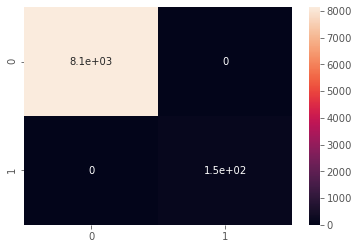

In [85]:
# Predicting the Test set results
y_pred = model.predict(X_test)
#y_pred = (y_pred > 0.5)

#Evaluate the classifier on test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy = ", (accuracy * 100.0), "%")

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)